In [3]:
from langchain_groq import ChatGroq
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, state, START, END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from langchain.chat_models import init_chat_model

In [4]:
load_dotenv()

True

In [5]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [6]:
graph_builder = StateGraph(State)

In [7]:
llm = ChatGroq(model="llama3-8b-8192")

In [8]:
# Node functionality
def chatbot(state: State):
    return {"messages":[llm.invoke(state["messages"])]}

In [9]:
from langgraph.checkpoint.memory import InMemorySaver

In [10]:
graph_builder = StateGraph(State)

graph_builder.add_node(
    node="llmchatbot",
    action=chatbot
)
graph_builder.add_edge(
    start_key=START,
    end_key="llmchatbot",
)
graph_builder.add_edge(
    start_key="llmchatbot",   
    end_key=END,
)
checkpointer = InMemorySaver()
graph = graph_builder.compile(checkpointer=checkpointer)

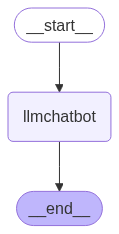

In [11]:
graph

In [12]:
config = {"configurable": {"thread_id": "1", "username": "user1"}}

In [13]:
output = graph.invoke({"messages": ["Hello, how are you?"]},config)

In [14]:
output['messages']

[HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='4a266045-def1-4992-95a0-441aae779ac8'),
 AIMessage(content='Hello! I\'m just a language model, I don\'t have feelings or emotions like humans do, so I don\'t have good or bad days. I\'m always "on" and ready to assist you with any questions or tasks you may have. It\'s great to chat with you! How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 16, 'total_tokens': 82, 'completion_time': 0.065795312, 'prompt_time': 0.002867373, 'queue_time': 0.287424305, 'total_time': 0.068662685}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--2dc4c61a-5b07-4fb2-95a8-7ca341ff8449-0', usage_metadata={'input_tokens': 16, 'output_tokens': 66, 'total_tokens': 82})]

In [15]:
graph.invoke({"messages": ["What are you doing?"]},config)

{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='4a266045-def1-4992-95a0-441aae779ac8'),
  AIMessage(content='Hello! I\'m just a language model, I don\'t have feelings or emotions like humans do, so I don\'t have good or bad days. I\'m always "on" and ready to assist you with any questions or tasks you may have. It\'s great to chat with you! How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 16, 'total_tokens': 82, 'completion_time': 0.065795312, 'prompt_time': 0.002867373, 'queue_time': 0.287424305, 'total_time': 0.068662685}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--2dc4c61a-5b07-4fb2-95a8-7ca341ff8449-0', usage_metadata={'input_tokens': 16, 'output_tokens': 66, 'total_tokens': 82}),
  HumanMessage(content='What are you doing?', additional_kwargs={}, response_metadata={},

In [19]:
graph.get_state(config)

StateSnapshot(values={'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='4a266045-def1-4992-95a0-441aae779ac8'), AIMessage(content='Hello! I\'m just a language model, I don\'t have feelings or emotions like humans do, so I don\'t have good or bad days. I\'m always "on" and ready to assist you with any questions or tasks you may have. It\'s great to chat with you! How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 16, 'total_tokens': 82, 'completion_time': 0.065795312, 'prompt_time': 0.002867373, 'queue_time': 0.287424305, 'total_time': 0.068662685}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--2dc4c61a-5b07-4fb2-95a8-7ca341ff8449-0', usage_metadata={'input_tokens': 16, 'output_tokens': 66, 'total_tokens': 82}), HumanMessage(content='What are you doing?', additional_kwargs={}, resp

In [20]:
list(graph.get_state_history(config))

[StateSnapshot(values={'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='4a266045-def1-4992-95a0-441aae779ac8'), AIMessage(content='Hello! I\'m just a language model, I don\'t have feelings or emotions like humans do, so I don\'t have good or bad days. I\'m always "on" and ready to assist you with any questions or tasks you may have. It\'s great to chat with you! How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 16, 'total_tokens': 82, 'completion_time': 0.065795312, 'prompt_time': 0.002867373, 'queue_time': 0.287424305, 'total_time': 0.068662685}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--2dc4c61a-5b07-4fb2-95a8-7ca341ff8449-0', usage_metadata={'input_tokens': 16, 'output_tokens': 66, 'total_tokens': 82}), HumanMessage(content='What are you doing?', additional_kwargs={}, res

In [22]:
from langgraph.store.memory import InMemoryStore

In [29]:
in_memory_store = InMemoryStore()

In [24]:
user_id = "1"
namespace_for_memory = (user_id, "memories")

In [26]:
memory_id = "id1"

In [27]:
memory = {'food_preference':'I like pizza'}

In [31]:
in_memory_store.put(namespace_for_memory, memory_id, memory)

In [33]:
in_memory_store.search(namespace_for_memory)[-1].dict()

{'namespace': ['1', 'memories'],
 'key': 'id1',
 'value': {'food_preference': 'I like pizza'},
 'created_at': '2025-07-09T14:21:16.600930+00:00',
 'updated_at': '2025-07-09T14:21:16.600940+00:00',
 'score': None}

In [35]:
in_memory_store.get(namespace_for_memory, memory_id)

Item(namespace=['1', 'memories'], key='id1', value={'food_preference': 'I like pizza'}, created_at='2025-07-09T14:21:16.600930+00:00', updated_at='2025-07-09T14:21:16.600940+00:00')